# pandas基础入门

In [1]:
import pandas as pd 
from pandas import Series, DataFrame

## 1. pandas的数据结构介绍

### 1.1 Series

In [2]:
se_1 = pd.Series([4, 7, -5, 1, 3])
print('ser_1:\n', se_1)
print('type of se_1:\n', type(se_1))

ser_1:
 0    4
1    7
2   -5
3    1
4    3
dtype: int64
type of se_1:
 <class 'pandas.core.series.Series'>


- 区别在于series具有索引index，另一个是values

In [3]:
se_1.values

array([ 4,  7, -5,  1,  3], dtype=int64)

In [4]:
se_1.index

RangeIndex(start=0, stop=5, step=1)

创建具有标签index的series数组（对象）

In [5]:
se_2 = pd.Series([10, 15, 30, 25, 30, 35], index =('1 mon', '2 mon', '3 mon', '4 mon', '5 mon', '6 mon'))

In [6]:
se_2

1 mon    10
2 mon    15
3 mon    30
4 mon    25
5 mon    30
6 mon    35
dtype: int64

In [7]:
print(se_2.values)

[10 15 30 25 30 35]


In [8]:
print(se_2.index)

Index(['1 mon', '2 mon', '3 mon', '4 mon', '5 mon', '6 mon'], dtype='object')


In [10]:
import matplotlib.pyplot as plt

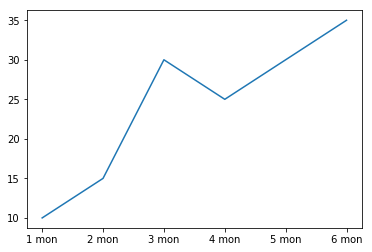

In [12]:
%matplotlib inline
plt.plot(se_2)

In [15]:
import numpy as np, pandas as pd

In [16]:
arr_1 = np.arange(10)
print(arr_1)
print(arr_1.dtype)

[0 1 2 3 4 5 6 7 8 9]
int32


In [17]:
se_1 = pd.Series(arr_1)
print(se_1)
print(type(se_1))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32
<class 'pandas.core.series.Series'>


* 可以通过字典的方式进行创建
* 可以通过标签的方式进行读取

In [19]:
se_1[0]

0

In [21]:
se_1[[0, 1, 3]]

0    0
1    1
3    3
dtype: int32

- 使用标量
- 需要注明索引

In [22]:
se_2 = pd.Series(5, index=range(3))
print(se_2)

0    5
1    5
2    5
dtype: int64


人为创建标签

### 1.2 DataFrame

- 通过二维数组创建

In [32]:
arr = np.array(range(12)).reshape((4, 3))
df_1 = pd.DataFrame(arr, index=['id_0', 'id_1', 'id_2', 'id_3'], columns=['col_0', 'col_1', 'col_2'])
print(df_1)
df_1

      col_0  col_1  col_2
id_0      0      1      2
id_1      3      4      5
id_2      6      7      8
id_3      9     10     11


,col_0,col_1,col_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [28]:
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [34]:
df_2 = pd.DataFrame(arr, index=['id_0', 1, 2, 'id_3'], columns=[0, 'col_1', 'col_2'])
df_2

,0,col_1,col_2
id_0,0,1,2
1,3,4,5
2,6,7,8
id_3,9,10,11


## 2.数据索引 index

In [36]:
print(se_1)
print(se_2) 
df_1

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32
0    5
1    5
2    5
dtype: int64


,col_0,col_1,col_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


- 获取目标数据

In [41]:
se_0 = pd.Series(range(6))
print(se_0)
print('index of se_0:\n',se_0.index)

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64
index of se_0:
 RangeIndex(start=0, stop=6, step=1)


In [43]:
se_0[0:5]

0    0
1    1
2    2
3    3
4    4
dtype: int64

## 3. pandas数据操作

In [45]:
se_0 = pd.Series([4, 7,-5, 4], index=['a', 'b', 'c', 'd'])
se_0

a    4
b    7
c   -5
d    4
dtype: int64

In [48]:
se_1 = se_0.reindex(['a', 'd','b', 'c', 'e'])
se_1

a    4.0
d    4.0
b    7.0
c   -5.0
e    NaN
dtype: float64

In [49]:
se_2 = se_0.reindex(['a', 'd','b', 'c', 'e'], fill_value=10)
se_2

a     4
d     4
b     7
c    -5
e    10
dtype: int64

In [50]:
df_1

,col_0,col_1,col_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [53]:
df_2 = df_1.reindex(['id_0', 'id_1', 'id_2', 'id_3', 'id_4'])
df_2

,col_0,col_1,col_2
id_0,0.0,1.0,2.0
id_1,3.0,4.0,5.0
id_2,6.0,7.0,8.0
id_3,9.0,10.0,11.0
id_4,NaN,NaN,NaN


In [54]:
df_3 = df_1.reindex(columns=['col_0', 'col_1', 'col_2', 'col_3'])
df_3

,col_0,col_1,col_2,col_3
id_0,0,1,2,NaN
id_1,3,4,5,NaN
id_2,6,7,8,NaN
id_3,9,10,11,NaN


### 3.1 丢弃指定轴上的项--drop

In [55]:
se_0

a    4
b    7
c   -5
d    4
dtype: int64

In [57]:
se_0_drop = se_0.drop('a')
se_0_drop

b    7
c   -5
d    4
dtype: int64

In [58]:
df_1.drop('id_1')

,col_0,col_1,col_2
id_0,0,1,2
id_2,6,7,8
id_3,9,10,11


In [59]:
df_1.drop('col_0')

ValueError: labels ['col_0'] not contained in axis

In [60]:
df_1.drop('col_0', axis=1)

,col_1,col_2
id_0,1,2
id_1,4,5
id_2,7,8
id_3,10,11


In [61]:
df_1.loc['id_0', 'col_1']

1

### 3.4 DataFrame和Series之间的运算

In [62]:
df_1

,col_0,col_1,col_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [64]:
se_3 = df_1.iloc[0]
se_3

col_0    0
col_1    1
col_2    2
Name: id_0, dtype: int32

In [65]:
se_3 + df_1

,col_0,col_1,col_2
id_0,0,2,4
id_1,3,5,7
id_2,6,8,10
id_3,9,11,13


### 3.5 排序和排名

In [66]:
df_4 = df_1.reindex(['id_0', 'id_2', 'id_3', 'id_1'])
df_4

,col_0,col_1,col_2
id_0,0,1,2
id_2,6,7,8
id_3,9,10,11
id_1,3,4,5


In [68]:
df_4.sort_index()

,col_0,col_1,col_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [71]:
df_4.sort_index(ascending=False)

,col_0,col_1,col_2
id_3,9,10,11
id_2,6,7,8
id_1,3,4,5
id_0,0,1,2


In [72]:
df_4.sort_values(by='col_0')

,col_0,col_1,col_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [73]:
se_0

a    4
b    7
c   -5
d    4
dtype: int64

In [74]:
se_0.rank()

a    2.5
b    4.0
c    1.0
d    2.5
dtype: float64

In [75]:
se_0.rank(method='first')

a    2.0
b    4.0
c    1.0
d    3.0
dtype: float64